# L1-Regularization. Dimensionality Reduction

In [34]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from mlxtend

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We would like to reduce the number of features in the dataset.
One way to select column is to use a specific type of regularization in Logistic Regression. L1-Regularization.

# L1- Regularization

In [25]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2)

In [26]:
lr_unreg = LogisticRegression(penalty=None)
lr_reg_l2 = LogisticRegression(penalty='l2', C=0.01)
lr_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)
lr_unreg.fit(X, y)
lr_reg_l2.fit(X, y)
lr_reg_l1.fit(X, y)

print(lr_unreg.coef_[0])
print(lr_reg_l2.coef_[0])
print(lr_reg_l1.coef_[0])

[-0.35835295 -0.11158388 -0.93936552  1.02569803 -0.07920975 -0.3154922
  0.35010008  0.21966049  0.3419955  -0.4985393 ]
[-0.22889929 -0.06426964 -0.52480083  0.64306459 -0.03359759 -0.20810964
  0.24842422  0.11819112  0.16330302 -0.24609818]
[-0.16397146  0.         -0.29790496  0.53143049  0.          0.
  0.08732096  0.          0.          0.        ]


L1: 0 as a weight -> the feature can be discarded

## L1 Regularization: Feature Selection

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.16398874  0.         -0.29792889  0.53143834  0.          0.
   0.08727304  0.          0.          0.        ]
 [-0.38915678 -0.1247574  -0.7463369   1.0358626   0.         -0.12607389
   0.16841178  0.          0.31674661 -0.37592548]
 [-0.46496103 -0.1687587  -0.83129473  1.16040288  0.         -0.16105428
   0.19326168  0.          0.39640756 -0.51865733]
 [-0.43775053 -0.14419711 -0.87337391  1.14104189  0.00286682 -0.19404432
   0.23603084  0.04159208  0.40214176 -0.51816126]
 [-0.37298574 -0.08354395 -0.932742    1.0893846   0.02819213 -0.23329966
   0.30238738  0.09700239  0.40846796 -0.48494901]
 [-0.4074737  -0.14138681 -0.89813278  1.08517874 -0.05498468 -0.25840277
   0.28808719  0.13612023  0.36375508 -0.51643616]
 [-0.44270963 -0.1615395

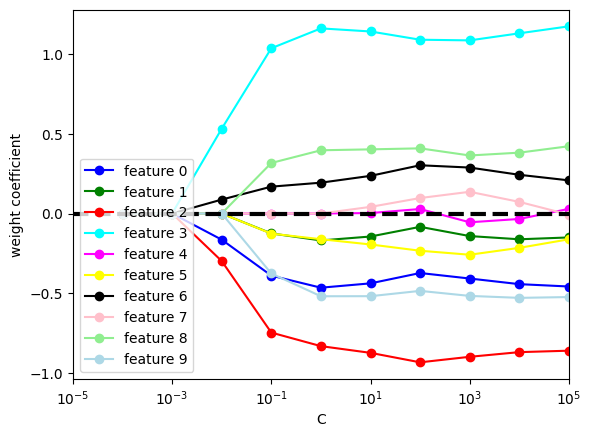

In [33]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr_clf = LogisticRegression(penalty='l1', solver='liblinear', C=10.**c)
    lr_clf.fit(X,y)
    weights.append(lr_clf.coef_[0])
    params.append(10.**c)
weights = np.array(weights) # we need array for the range()
print(weights)
for column, color in zip(range(weights.shape[1]), colors):
    ax.plot(params, weights[:, column], label=f'feature {column}', color=color, marker='o')
ax.axhline(0, color='black', linestyle='--', linewidth=3)
ax.set_xlim([10**(-5), 10**5])
ax.set_ylabel('weight coefficient')
ax.set_xlabel('C')
ax.set_xscale('log')
ax.legend(loc='lower left')

For each value of C it shows the trend for the weight associated with a specific feature.


# Dimensionality Reduction

## Dimensionality Reduction by Feature Selection

In SKLearn, Sequential Feature Selection - SFS - is available in the SequentialFeatureSelector transformer in the package sklearn.feature_selection. 
SFS can be either forward or backward.

However, we will use the implementation released in the library mlxtend, made by Sebastian Raschka. Through this library we are able to access the steps and evaluate the performance during the feature selection process.

We can import the transformer SequentialFeatureSelector and apply it to the famous Wine Dataset.
In this dataset each instance is a type of wine and it is described by a set of  measurements related to the properties of the wine. The label (1, 2, 3) indicates the quality of the wine: medium, good, excellent. The task is to predict the taste of the wine given the set of properties of the wine.


In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

df_wine = pd.read_csv('data/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
y = df_wine['Class label']
feature_matrix = df_wine.drop(['Class label'], axis=1)
feature_matrix.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, y, stratify=y, train_size=0.1)
ct = ColumnTransformer(
    [('all', StandardScaler(), X_train.columns)],
    verbose_feature_names_out=False,
    remainder='drop'
)
ct.fit(X_train)
X_train_std = pd.DataFrame(ct.transform(X_train), columns=ct.get_feature_names_out())
ct.transform(X_test)

array([[-0.73434532, -1.60345157, -3.54760888, ...,  0.32873761,
        -1.40465808, -0.82190043],
       [-0.33568158, -0.66498506, -0.25587043, ...,  0.78749831,
         0.61330142, -0.16605053],
       [-0.73434532, -1.46322095, -0.64774405, ...,  0.2870321 ,
         0.04766125, -0.34860669],
       ...,
       [ 0.04020139,  3.63901653, -0.53018196, ..., -1.00583897,
         0.55215113, -1.29519417],
       [ 0.52998828, -0.66498506,  0.56706419, ...,  0.2870321 ,
         1.11779129,  0.53036739],
       [ 0.62111142, -0.75128083,  0.763001  , ...,  0.03679899,
         0.44513813,  1.20650131]])

Now, we can run the feature selection algorithm. We use the forward selection till reaching k=8. As performance measure we set the accuracy.

In [38]:
sfs1 = SFS(Perceptron(), # we define classifer to train and get the prediction
           k_features=8, # number of features we want (so, instead of 13 we want 8)
           forward=True, # forward selection, otherwise False for backward selection
           scoring='accuracy', # performance measure
           cv=0 # cross validation 
           ) 
# basically, we obtain the predictor we key features
sfs1.fit(X_train_std, y_train)

SequentialFeatureSelector(cv=0, estimator=Perceptron(), k_features=(8, 8),
                          scoring='accuracy')

We can get the performance obtained by adding the selected feature f^+ through the method get_metric_dict(). It returns a dictionary whose keys are the iteration over k and the values contain a set of statistics and the average performance measure.
We exploit this information to draw the trend of performance by increasing the number of selected features.

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Performance measure')

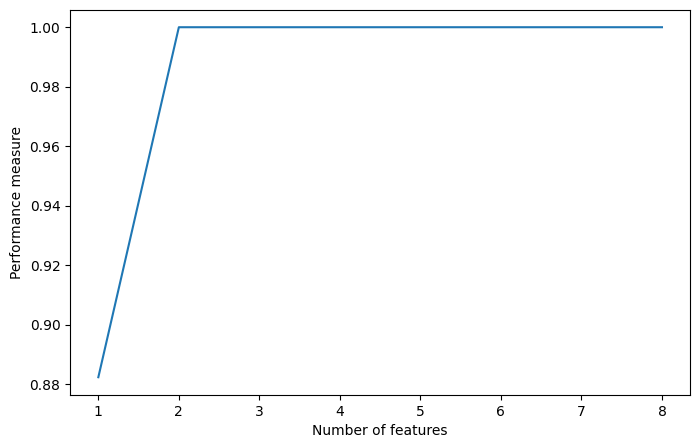

In [39]:
scores = sfs1.get_metric_dict()
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.plot(list(scores.keys()), [v['avg_score'] for v in scores.values()])
ax.set_xlabel('Number of features')
ax.set_ylabel('Performance measure')